#### TF.SnoqualmieData.BoundaryLayerObs
Plots of boundary layer relevant variables @ Snoqualmie

In [7]:
# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xray
from scipy.stats.stats import pearsonr

# OS interaction
import sys, pickle, os

# import subplots function for plotting
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('talk')
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap

# Solargeometry
import solargeo

In [3]:
#### Directory Lists
# Unix
if 'linux' in sys.platform:
    dir_pre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dir_pre = '/Users/karllapo/gdrive/'

dirProj = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/'           # Project directory
dirPrint = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/Graphics'  # Directory for printing figures
dirData = dir_pre+'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ'    # Processed data directory

## Read Supporting Data - Time Series

In [4]:
## Read the formatted supporting snoqualmie obs
os.chdir(dirData)
support = xray.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')
tarray = xray.open_dataset('SnoqualmieObs.SupportData.TArray.Spring2015.nc')

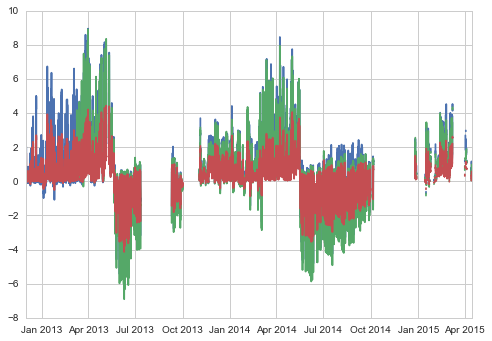

In [5]:
## Plot tempearture gradients by height
fig, ax = plt.subplots(1,1)
ax.plot(support.time,(support.T4-support.Tsrf)/(4-support.Snowdepth))
ax.plot(support.time,(support.T3-support.Tsrf)/(3.82-support.Snowdepth))
ax.plot(support.time,(support.T6-support.Tsrf)/(6.35-support.Snowdepth))

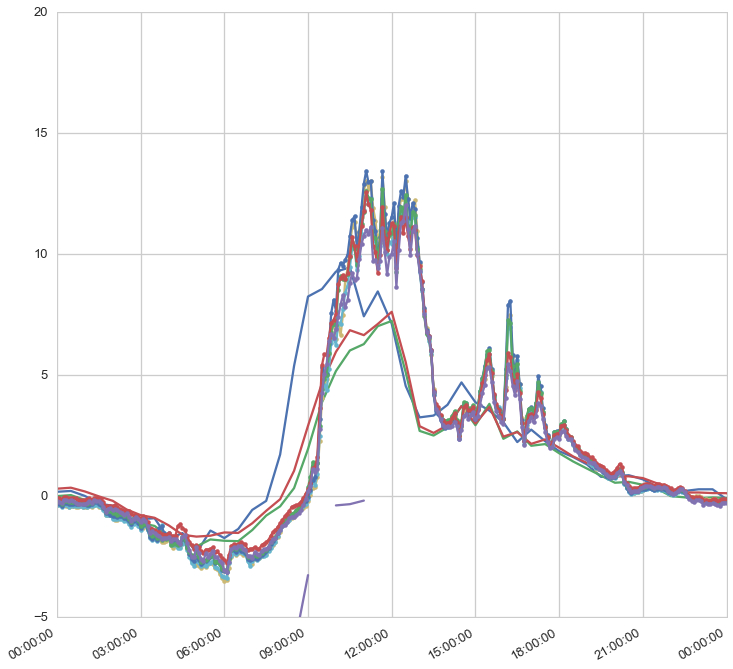

In [17]:
## Plot temperature, RH, and wind by height
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.plot(support.time,support.T4)
ax.plot(support.time,support.T3)
ax.plot(support.time,support.T6)
ax.plot(support.time,support.Tsrf)

vars_to_plot = ['T1','T2','T3','T4','T5','T6']
for v in vars_to_plot:
    ax.plot(tarray.time,tarray[v],label='array '+v,marker='.')

# Format
ax.set_xlim(datetime(2015,4,3),datetime(2015,4,4))
ax.set_ylim(-5,20)
fig.autofmt_xdate()